In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import 

In [2]:
url = 'https://raw.githubusercontent.com/yannismxflux/securite_alimentaire/main/export_alimconfiance.csv'
data = pd.read_csv(url, encoding = "utf-8",sep=';',dtype=object)

In [3]:
data.head()

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_type_activite
0,NATURALIA FRANCE (NATURALIA FRANCE),30247464800789,45 AV PIERRE LAROUSSE,92240,MALAKOFF,15914760,2021-03-03T01:00:00+01:00,Alimentation générale,Satisfaisant,NaN,"48.822231,2.303769",Alimentation générale,Autres
1,KERMOYAN (RESTAU RAPIDE),30112032500024,MARCHE,69500,BRON,16252422,2021-11-26T01:00:00+01:00,Restaurant,Très satisfaisant,NaN,"45.743534,4.922893",Restaurant,Autres
2,NATURALIA (NATURALIA FRANCE),30247464801894,36 RUE EUGENE EICHENBERGER,92800,PUTEAUX,15903092,2021-02-22T01:00:00+01:00,Alimentation générale,Très satisfaisant,NaN,"48.881317,2.23746",Alimentation générale,Autres
3,JARDINERIE DE CHEVREUSE (JARDINERIE DE CHEVREUSE),30890741900011,LE BREUIL,78460,CHEVREUSE,15901554,2021-02-19T01:00:00+01:00,_,Satisfaisant,NaN,"48.698235,2.027014",NaN,Autres
4,INTERMARCHE (VIRODIS),30668909200022,38 AV LE FOLL,94290,VILLENEUVE LE ROI,15968279,2021-04-14T02:00:00+02:00,Alimentation générale,Satisfaisant,NaN,"48.730573,2.426559",Alimentation générale,Autres


# 1. Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Analyse de Forme :
- **variable target** : Synthese_eval_sanit
- **lignes et colonnes** : (35558, 12)
- **types de variables** : qualitatives : 12, quantitatives : 0
- **Analyse des valeurs manquantes** :
   filtre 27.l5% Agrement  72.02%

#### Analyse de Fond :
- **Visualisation de la target** :
-**Satisfaisant**                     0.526239.  
-**Très satisfaisant**                0.422268.  
-**A améliorer**                      0.048203.  
-**A corriger de manière urgente**    0.003290.  
    
    
    
- **Signification des variables** :
    -  APP_Libelle_etablissement: Nom de l'Établissment              
    -  SIRET                    : Numero d'identification             
    -  Adresse_2_UA             : Adresse de l'établissment             
    -  Code_postal              : Code postal             
    -  Libelle_commune          : Nome de la commune de l'établissment            
    -  Numero_inspection        : Numero de l'inspection             
    -  Date_inspection          : Date de l'inpection             
    -  APP_Libelle_activite_etablissement : Intitulé de l'activité de l'établissement   
    -  Synthese_eval_sanit      : Résultat de l'inspection             
    -  Agrement                 : Numero d'agrement pour les entreprises agrée             
    -  geores                   : geo-localisation             
    -  filtre                   : Autre indicateur de l'activité de l'établissment             
    -  ods_type_activite        : Secteur d'activité de l'établissement agro-alimentaire



- **Relation Variables / Target** :
Sans transformation mis a part l'encodage des données l'analyse du Dataframe ne nous a pas permis de relevé de correlation explicite
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :


- **NaN analyse** : 

### hypotheses nulle (H0): 



    

### Analyse de la forme des données

In [4]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35558 entries, 0 to 35557
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   APP_Libelle_etablissement           35558 non-null  object
 1   SIRET                               35558 non-null  object
 2   Adresse_2_UA                        35109 non-null  object
 3   Code_postal                         35548 non-null  object
 4   Libelle_commune                     35558 non-null  object
 5   Numero_inspection                   35558 non-null  object
 6   Date_inspection                     35558 non-null  object
 7   APP_Libelle_activite_etablissement  35558 non-null  object
 8   Synthese_eval_sanit                 35558 non-null  object
 9   Agrement                            9946 non-null   object
 10  geores                              34964 non-null  object
 11  filtre                              25768 non-null  ob

In [5]:
df.describe()


,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_type_activite
count,35558,35558,35109,35548,35558,35558,35558,35558,35558,9946,34964,25768,35558
unique,27527,31012,29022,5126,9384,35558,299,157,4,7823,29201,103,7
top,ECOLE PRIMAIRE PUBLIQUE,55208329701257,LE BOURG,75015,Paris 15e Arrondissement,22-001142-1,2021-11-23T01:00:00+01:00,Restaurant,Satisfaisant,29233001,"48.859,2.347",Restaurant,Autres
freq,228,11,101,568,556,1,299,10336,18712,10,47,10336,26478


In [51]:
df['ods_type_activite'].value_counts(normalize=True)

Autres                                              0.744643
Viandes et produits carnés                          0.078070
Produits de la mer et d'eau douce                   0.052590
Lait et produits laitiers                           0.050565
Abattoirs                                           0.034423
Transport et entreposage de denrées alimentaires    0.025929
Œufs et ovoproduits                                 0.013780
Name: ods_type_activite, dtype: float64

In [6]:
df.shape

(35558, 13)

<AxesSubplot:ylabel='None'>

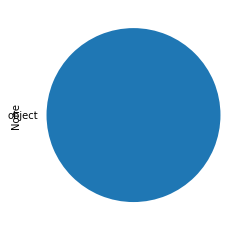

In [7]:
df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

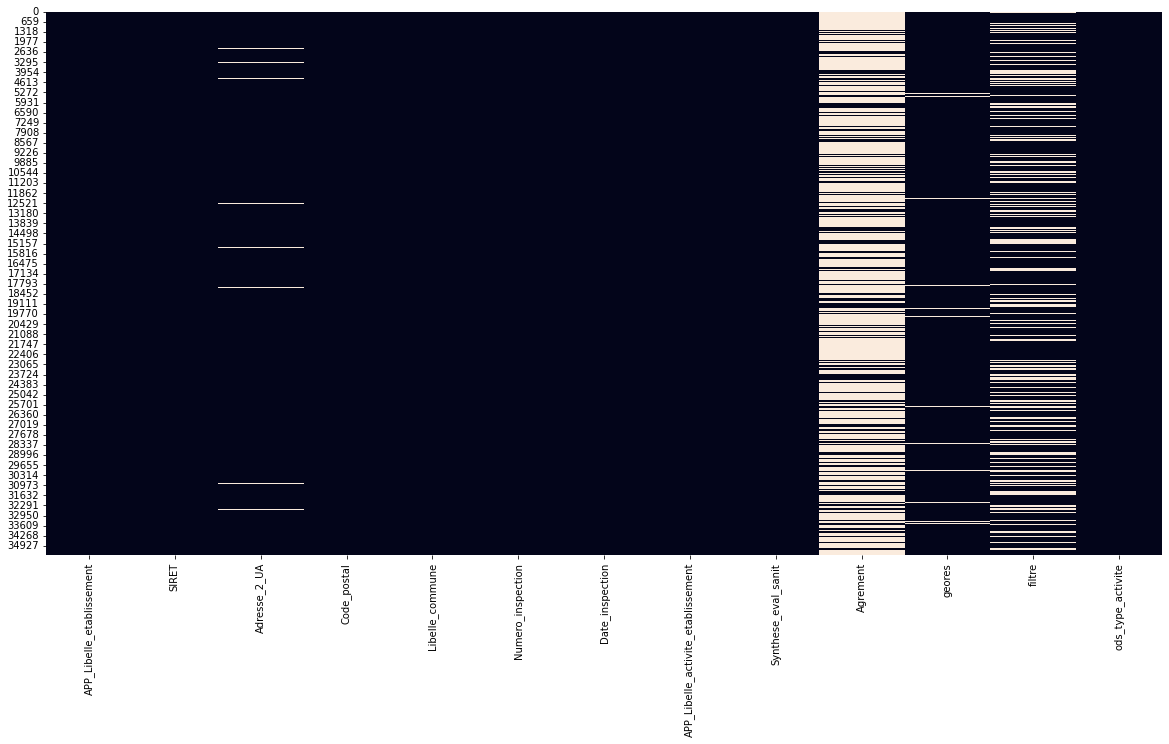

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [9]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

APP_Libelle_etablissement             0.000000
SIRET                                 0.000000
Libelle_commune                       0.000000
Numero_inspection                     0.000000
Date_inspection                       0.000000
APP_Libelle_activite_etablissement    0.000000
Synthese_eval_sanit                   0.000000
ods_type_activite                     0.000000
Code_postal                           0.000281
Adresse_2_UA                          0.012627
geores                                0.016705
filtre                                0.275325
Agrement                              0.720288
dtype: float64

In [10]:
df['Synthese_eval_sanit'].value_counts(normalize=True)

Satisfaisant                     0.526239
Très satisfaisant                0.422268
A améliorer                      0.048203
A corriger de manière urgente    0.003290
Name: Synthese_eval_sanit, dtype: float64

## Analyse du Fond
### 1. Visulation initiale - Elimination des colonnes inutiles

In [11]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
df.head()

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_type_activite
0,NATURALIA FRANCE (NATURALIA FRANCE),30247464800789,45 AV PIERRE LAROUSSE,92240,MALAKOFF,15914760,2021-03-03T01:00:00+01:00,Alimentation générale,Satisfaisant,NaN,"48.822231,2.303769",Alimentation générale,Autres
1,KERMOYAN (RESTAU RAPIDE),30112032500024,MARCHE,69500,BRON,16252422,2021-11-26T01:00:00+01:00,Restaurant,Très satisfaisant,NaN,"45.743534,4.922893",Restaurant,Autres
2,NATURALIA (NATURALIA FRANCE),30247464801894,36 RUE EUGENE EICHENBERGER,92800,PUTEAUX,15903092,2021-02-22T01:00:00+01:00,Alimentation générale,Très satisfaisant,NaN,"48.881317,2.23746",Alimentation générale,Autres
3,JARDINERIE DE CHEVREUSE (JARDINERIE DE CHEVREUSE),30890741900011,LE BREUIL,78460,CHEVREUSE,15901554,2021-02-19T01:00:00+01:00,_,Satisfaisant,NaN,"48.698235,2.027014",NaN,Autres
4,INTERMARCHE (VIRODIS),30668909200022,38 AV LE FOLL,94290,VILLENEUVE LE ROI,15968279,2021-04-14T02:00:00+02:00,Alimentation générale,Satisfaisant,NaN,"48.730573,2.426559",Alimentation générale,Autres


<AxesSubplot:>

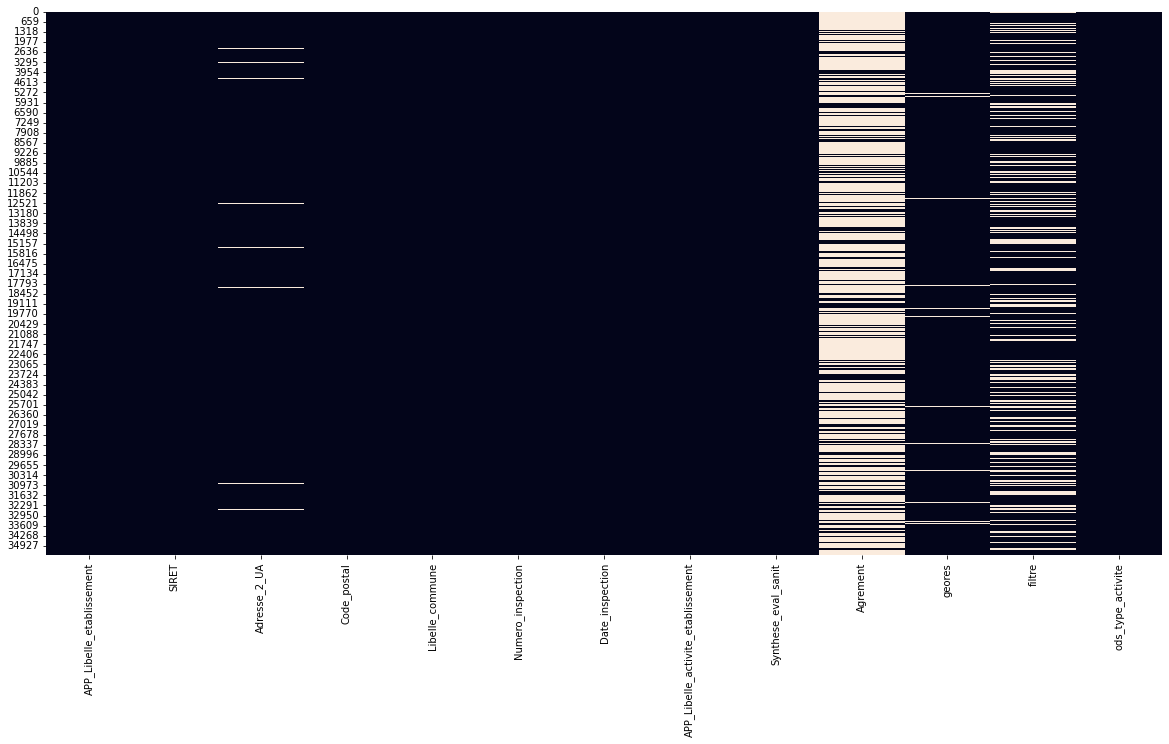

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

## La colonne filtre :

La colonne filtre peut être reduite a l'app libelle activite car lorsque le champ n'est pas vide sa valeur est égale a celle de la colonne libelle activité

In [13]:
df = df.drop('filtre', axis=1)
#df[df['filtre']!=df["APP_Libelle_activite_etablissement"]]

In [14]:
df.head()

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,ods_type_activite
0,NATURALIA FRANCE (NATURALIA FRANCE),30247464800789,45 AV PIERRE LAROUSSE,92240,MALAKOFF,15914760,2021-03-03T01:00:00+01:00,Alimentation générale,Satisfaisant,NaN,"48.822231,2.303769",Autres
1,KERMOYAN (RESTAU RAPIDE),30112032500024,MARCHE,69500,BRON,16252422,2021-11-26T01:00:00+01:00,Restaurant,Très satisfaisant,NaN,"45.743534,4.922893",Autres
2,NATURALIA (NATURALIA FRANCE),30247464801894,36 RUE EUGENE EICHENBERGER,92800,PUTEAUX,15903092,2021-02-22T01:00:00+01:00,Alimentation générale,Très satisfaisant,NaN,"48.881317,2.23746",Autres
3,JARDINERIE DE CHEVREUSE (JARDINERIE DE CHEVREUSE),30890741900011,LE BREUIL,78460,CHEVREUSE,15901554,2021-02-19T01:00:00+01:00,_,Satisfaisant,NaN,"48.698235,2.027014",Autres
4,INTERMARCHE (VIRODIS),30668909200022,38 AV LE FOLL,94290,VILLENEUVE LE ROI,15968279,2021-04-14T02:00:00+02:00,Alimentation générale,Satisfaisant,NaN,"48.730573,2.426559",Autres


### Examen de la colonne target

In [15]:
df['Synthese_eval_sanit'].value_counts(normalize=True)

Satisfaisant                     0.526239
Très satisfaisant                0.422268
A améliorer                      0.048203
A corriger de manière urgente    0.003290
Name: Synthese_eval_sanit, dtype: float64

On peut voir que les categories "Tres satisfaisant" et "Satisfaisant" represente environ 94% de nos valeurs


In [16]:
df[df["Synthese_eval_sanit"]=='A corriger de manière urgente'].describe()

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,ods_type_activite
count,117,117,116,117,117,117,117,117,117,14,117,117
unique,114,114,113,99,99,117,87,17,1,14,113,7
top,ZIMPFER JULIEN,45382473200029,FERME DU LANDGRABEN,67240,Bischwiller,21-029226-1,2021-04-15T02:00:00+02:00,Restaurant,A corriger de manière urgente,17153002,"48.744134,7.886703",Autres
freq,4,4,4,4,4,1,4,56,117,1,4,100


Ici que la categorie la moins representée "A corriger de manière urgente" represantant 0,3% de notre dataframe nous indique que le datasets n'est pas proportionné et que nous ne disposons que de tres peu d'exemple pour les deux categories qui ont le plus d'interet dans notre contexte

In [17]:
df['APP_Libelle_activite_etablissement'].value_counts()[df['APP_Libelle_activite_etablissement'].value_counts()<= 10]

Alimentation générale|Traiteur                                                          10
Fromagerie|Libre service|Alimentation générale                                           9
Collecte de gibier sauvage                                                               9
Découpe de gros gibier d'élevage                                                         9
Fromagerie|Libre service|Alimentation générale|Boucherie-Charcuterie                     8
                                                                                        ..
Rayon poissonnerie|Rayon fromagerie                                                      1
Fromagerie|Boulangerie-Pâtisserie|Poissonnerie|Boucherie-Charcuterie                     1
Alimentation générale|Rayon pain/viennoiserie/pâtisserie|Rayon boucherie-charcuterie     1
Fromagerie|Alimentation générale|Glacier|Boucherie-Charcuterie                           1
Poissonnerie|Traiteur|Boucherie-Charcuterie                                              1

In [18]:
df['APP_Libelle_activite_etablissement'].value_counts()[df['APP_Libelle_activite_etablissement'].value_counts()<= 10].sum()

275

<AxesSubplot:xlabel='APP_Libelle_activite_etablissement', ylabel='count'>

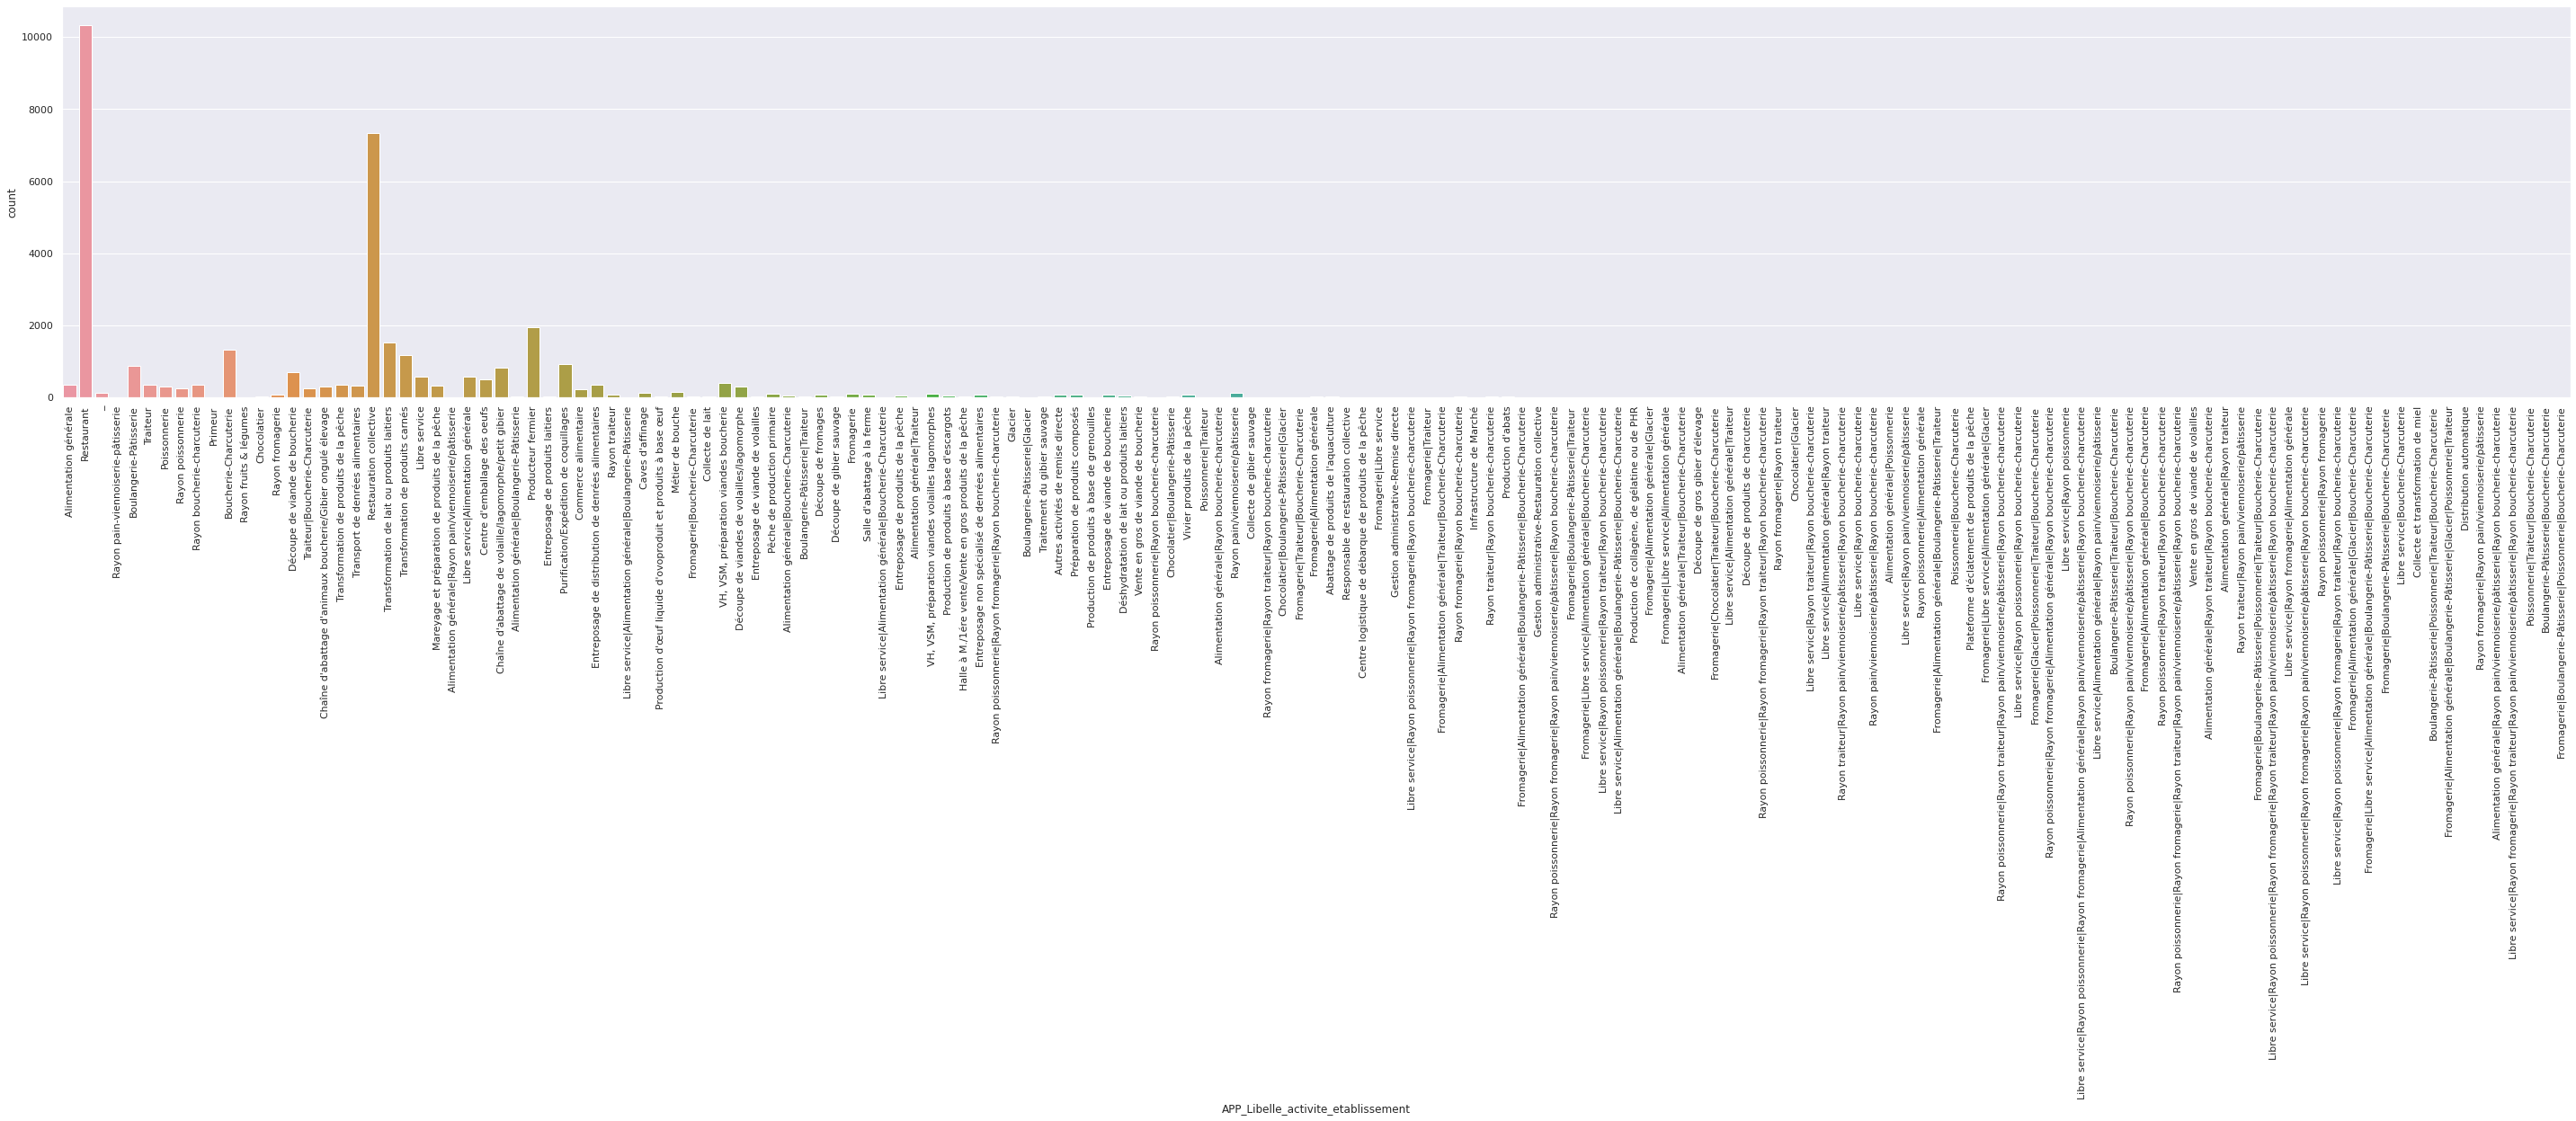

In [19]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(50,8))
plt.xticks(rotation='vertical')
sns.countplot(data=df,x="APP_Libelle_activite_etablissement")

<AxesSubplot:xlabel='APP_Libelle_activite_etablissement', ylabel='count'>

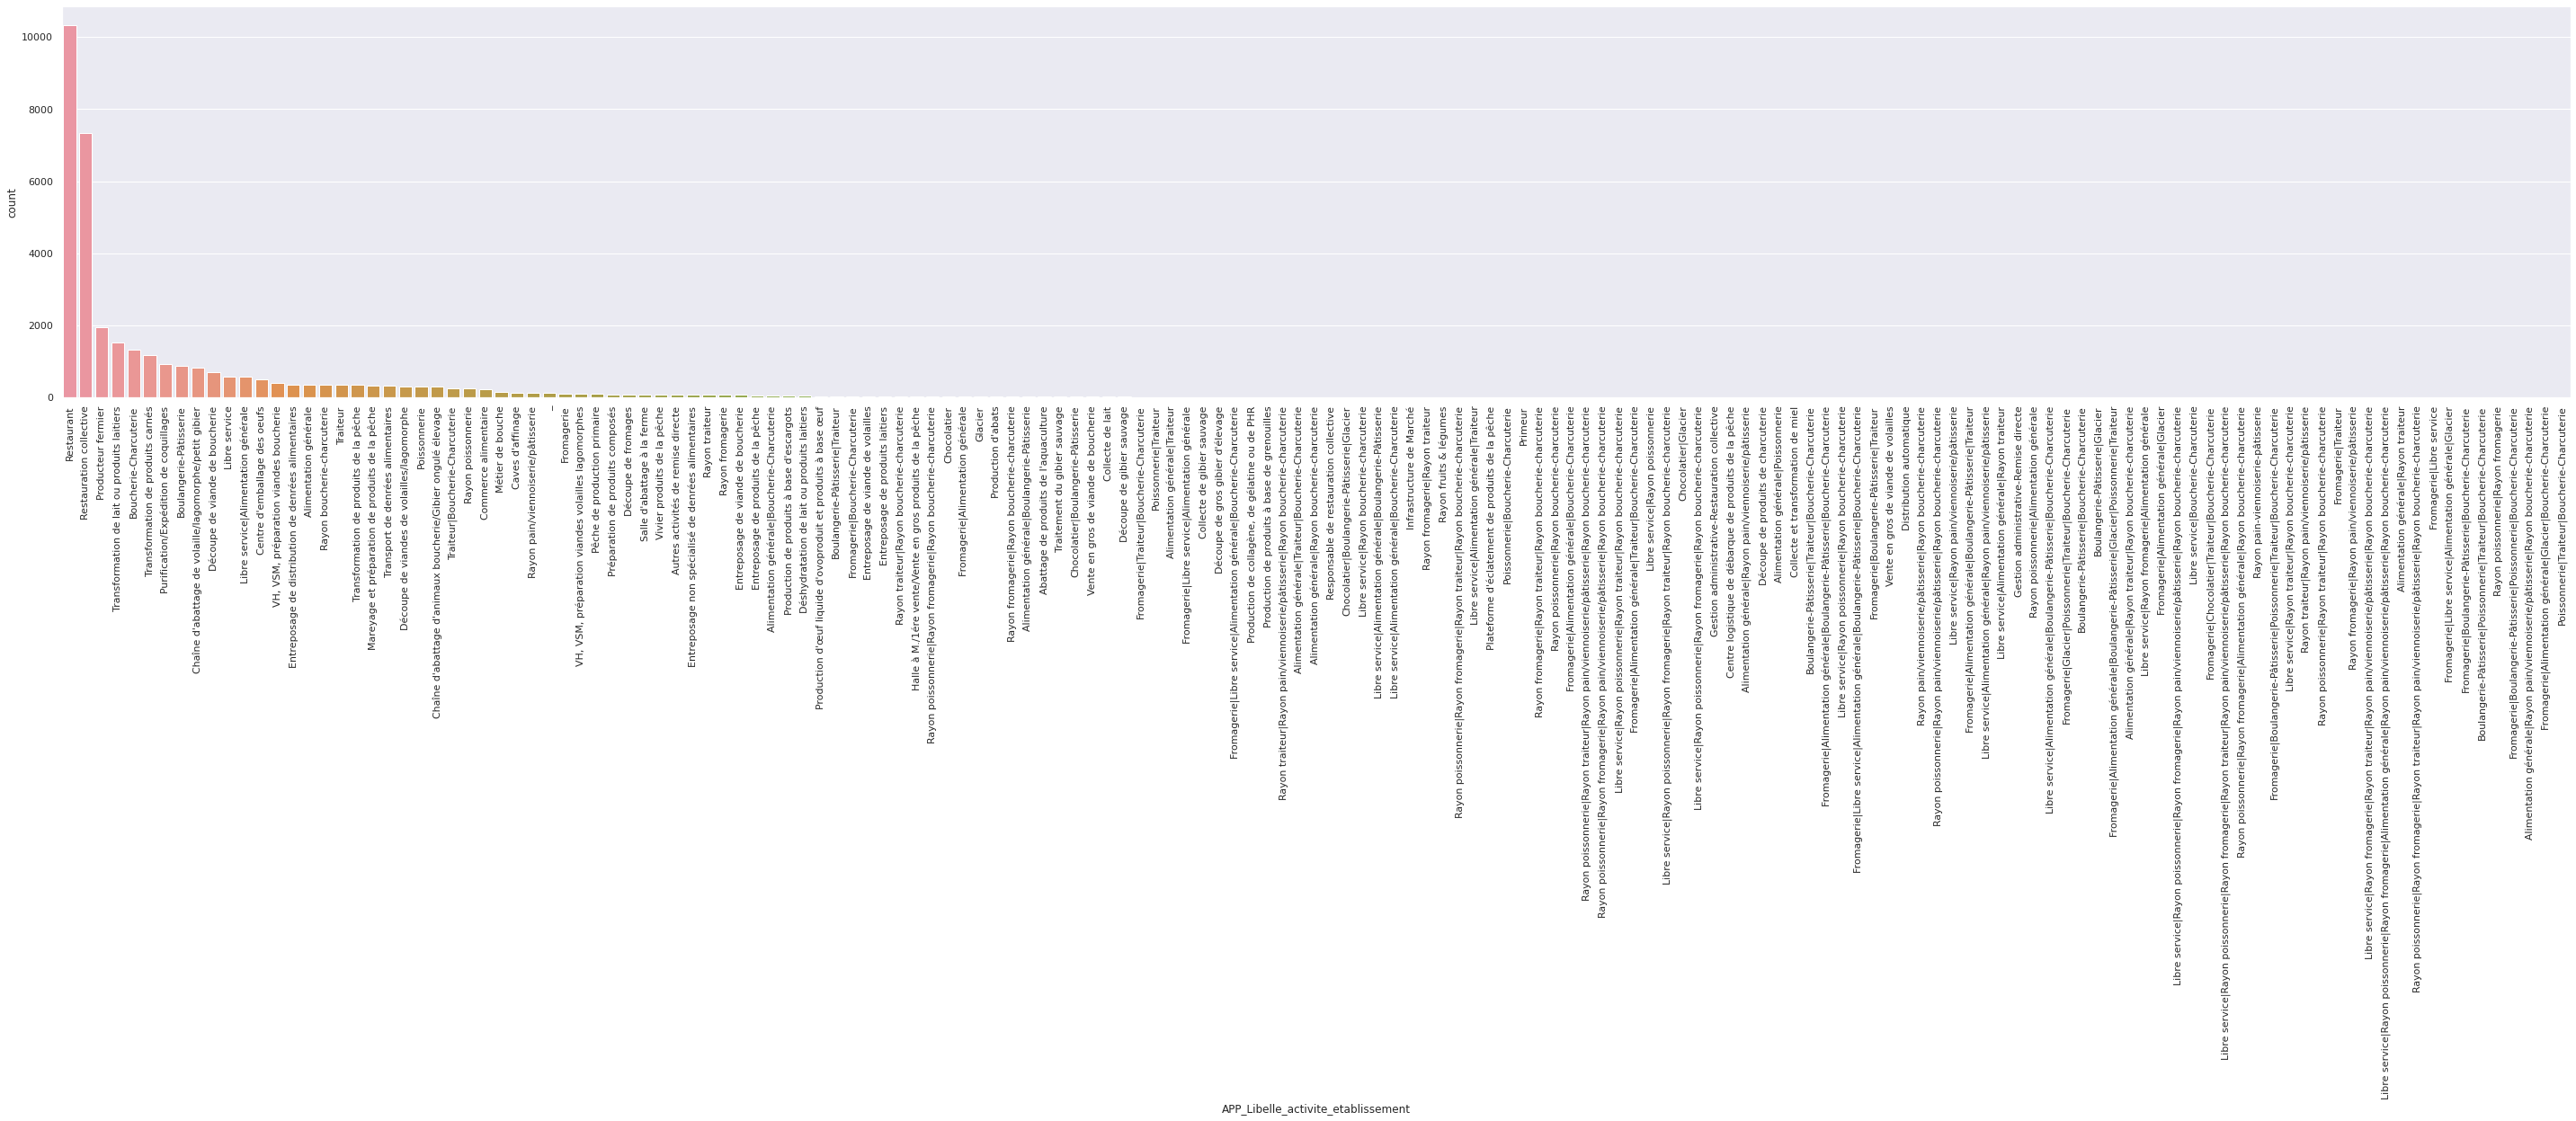

In [20]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(50,8))
plt.xticks(rotation='vertical')
sns.countplot(data=df,x="APP_Libelle_activite_etablissement", order=df['APP_Libelle_activite_etablissement'].value_counts().index)

In [21]:
list_of_activite = list(df['APP_Libelle_activite_etablissement'].value_counts()[df['APP_Libelle_activite_etablissement'].value_counts()<= 10].index)

In [22]:
df_activite = df[df['APP_Libelle_activite_etablissement'].isin(list_of_activite)]
df_activite

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,ods_type_activite
6,LECLERC (PLOUDAL DISTRIBUTION),30959801900052,KERUSCAT,29830,PLOUDALMEZEAU,16265073,2021-12-06T01:00:00+01:00,Rayon pain-viennoiserie-pâtisserie,Très satisfaisant,NaN,"48.540309,-4.66693",Autres
45,MANGEONS FRAIS (LES HALLES BLACHERE BERNARD),34029254901225,7 BD DU HUIT MAI,71210,TORCY,15972755,2021-04-15T02:00:00+02:00,Primeur,Très satisfaisant,NaN,"46.781683,4.438622",Autres
51,LIDL,34326262221475,RUE D AUSTRALIE,80000,AMIENS,15930027,2021-03-15T01:00:00+01:00,Rayon fruits & légumes,Très satisfaisant,NaN,"49.903936,2.275338",Autres
128,PETIT CASINO (DISTRIBUTION CASINO FRANCE),42826802333888,14 PL CARNOT,69400,VILLEFRANCHE SUR SAONE,15898453,2021-02-17T01:00:00+01:00,Rayon fruits & légumes,Satisfaisant,NaN,"45.98563,4.717885",Autres
238,MONSIEUR TY LAM,47801174500013,3 AV JOFFRE,92380,GARCHES,16221738,2021-10-28T02:00:00+02:00,Primeur,Satisfaisant,NaN,"48.838817,2.186315",Autres
...,...,...,...,...,...,...,...,...,...,...,...,...
34869,PETIT CASINO,81256581000015,4 ROUTE NEUVE,48320,Ispagnac,21-048219-1,2021-06-18T02:00:00+02:00,Libre service|Alimentation générale|Boulangeri...,Satisfaisant,NaN,"44.371029,3.534767",Autres
34982,MA FERME EN VILLE,80126411000033,112 RUE DE SEZE,69006,Lyon 6e Arrondissement,21-063921-1,2021-08-11T02:00:00+02:00,Fromagerie|Libre service|Alimentation générale...,Satisfaisant,NaN,"45.768893,4.854972",Autres
35023,EURL ANDRE PASCAL,49216897600016,"10, RUE DU PORTAIL",41300,Orçay,21-072947-1,2021-09-14T02:00:00+02:00,Collecte de gibier sauvage,Très satisfaisant,NaN,"47.288818,2.111666",Abattoirs
35333,PEYNE,89332379000012,6 PL SAINT BLAISE,23250,Pontarion,21-015998-1,2021-06-15T02:00:00+02:00,Fromagerie|Libre service|Alimentation générale...,Très satisfaisant,NaN,"45.997246,1.850505",Autres


In [23]:
df_sample = df_activite.sample(10)
df_sample

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,ods_type_activite
12631,SUPER MONOPRIX,55208329701307,20 BOULEVARD DE CHARONNE,75020,Paris 20e Arrondissement,22-002228-1,2022-01-13T01:00:00+01:00,Libre service|Rayon pain/viennoiserie/pâtisserie,Très satisfaisant,NaN,"48.853822,2.396827",Autres
14226,FEDERATION DEPARTEMENTALE DES CHASSEURS DE TAR...,77729305100028,Le Pech,82440,Réalville,21-053675-1,2021-06-25T02:00:00+02:00,Collecte de gibier sauvage,Très satisfaisant,NaN,"44.128241,1.46026",Abattoirs
17999,SPAR,84317245300014,257 RTE DE NOTRE DAME DE LA GORGE,74170,Les Contamines-Montjoie,21-008702-1,2021-02-02T01:00:00+01:00,Fromagerie|Alimentation générale|Boucherie-Cha...,Satisfaisant,NaN,"45.820413,6.727541",Autres
972,MORITZ ALBERT,88387640100026,4 PL EMILE LETURCQ,80300,ALBERT,15910120,2021-02-22T01:00:00+01:00,Rayon fruits & légumes,Très satisfaisant,NaN,"50.002406,2.650944",Autres
16586,A2PAS,82193739800021,20 PLACE DU MARCHE SAINT HONORE,75001,Paris 1er Arrondissement,21-092857-1,2021-11-16T01:00:00+01:00,Libre service|Rayon pain/viennoiserie/pâtisserie,Satisfaisant,NaN,"48.866369,2.331871",Autres
7314,SAGET DAVID,53330805200026,9 PLACE JOFFRE,56400,Auray,21-029971-1,2021-06-22T02:00:00+02:00,Fromagerie|Libre service|Alimentation générale,Satisfaisant,NaN,"47.666823,-2.987059",Autres
674,LES 5 M,82027589900020,2 ALL PERONNET,92320,CHATILLON,15921308,2021-03-08T01:00:00+01:00,Primeur,Satisfaisant,NaN,"48.803889,2.279943",Autres
11742,SOOMINI,84093297400016,19 B RUE RICHARD LENOIR,61100,Flers,21-040809-1,2021-05-27T02:00:00+02:00,Alimentation générale|Traiteur,Très satisfaisant,NaN,"48.747991,-0.571202",Autres
22004,TREBOULDIS,40262057900019,TOUBALAN,29100,Douarnenez,21-058698-1,2021-07-22T02:00:00+02:00,Libre service|Rayon poissonnerie|Rayon traiteu...,Très satisfaisant,NaN,"48.09101,-4.34856",Autres
10119,THEMA,81488313800012,531 RN20,82350,Albias,21-059746-1,2021-07-27T02:00:00+02:00,Libre service|Alimentation générale|Traiteur,Satisfaisant,NaN,"44.081228,1.451882",Autres


In [24]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 12631 to 10119
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   APP_Libelle_etablissement           10 non-null     object
 1   SIRET                               10 non-null     object
 2   Adresse_2_UA                        10 non-null     object
 3   Code_postal                         10 non-null     object
 4   Libelle_commune                     10 non-null     object
 5   Numero_inspection                   10 non-null     object
 6   Date_inspection                     10 non-null     object
 7   APP_Libelle_activite_etablissement  10 non-null     object
 8   Synthese_eval_sanit                 10 non-null     object
 9   Agrement                            0 non-null      object
 10  geores                              10 non-null     object
 11  ods_type_activite                   10 non-null     o

In [25]:
def explode_dataframe(df, column):
    df[column] = df[column].astype(str).str.split('|')
    df = df.explode(column)
    return df

df_sample = explode_dataframe(df_sample, 'APP_Libelle_activite_etablissement')
df_sample


,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,ods_type_activite
12631,SUPER MONOPRIX,55208329701307,20 BOULEVARD DE CHARONNE,75020,Paris 20e Arrondissement,22-002228-1,2022-01-13T01:00:00+01:00,Libre service,Très satisfaisant,NaN,"48.853822,2.396827",Autres
12631,SUPER MONOPRIX,55208329701307,20 BOULEVARD DE CHARONNE,75020,Paris 20e Arrondissement,22-002228-1,2022-01-13T01:00:00+01:00,Rayon pain/viennoiserie/pâtisserie,Très satisfaisant,NaN,"48.853822,2.396827",Autres
14226,FEDERATION DEPARTEMENTALE DES CHASSEURS DE TAR...,77729305100028,Le Pech,82440,Réalville,21-053675-1,2021-06-25T02:00:00+02:00,Collecte de gibier sauvage,Très satisfaisant,NaN,"44.128241,1.46026",Abattoirs
17999,SPAR,84317245300014,257 RTE DE NOTRE DAME DE LA GORGE,74170,Les Contamines-Montjoie,21-008702-1,2021-02-02T01:00:00+01:00,Fromagerie,Satisfaisant,NaN,"45.820413,6.727541",Autres
17999,SPAR,84317245300014,257 RTE DE NOTRE DAME DE LA GORGE,74170,Les Contamines-Montjoie,21-008702-1,2021-02-02T01:00:00+01:00,Alimentation générale,Satisfaisant,NaN,"45.820413,6.727541",Autres
17999,SPAR,84317245300014,257 RTE DE NOTRE DAME DE LA GORGE,74170,Les Contamines-Montjoie,21-008702-1,2021-02-02T01:00:00+01:00,Boucherie-Charcuterie,Satisfaisant,NaN,"45.820413,6.727541",Autres
972,MORITZ ALBERT,88387640100026,4 PL EMILE LETURCQ,80300,ALBERT,15910120,2021-02-22T01:00:00+01:00,Rayon fruits & légumes,Très satisfaisant,NaN,"50.002406,2.650944",Autres
16586,A2PAS,82193739800021,20 PLACE DU MARCHE SAINT HONORE,75001,Paris 1er Arrondissement,21-092857-1,2021-11-16T01:00:00+01:00,Libre service,Satisfaisant,NaN,"48.866369,2.331871",Autres
16586,A2PAS,82193739800021,20 PLACE DU MARCHE SAINT HONORE,75001,Paris 1er Arrondissement,21-092857-1,2021-11-16T01:00:00+01:00,Rayon pain/viennoiserie/pâtisserie,Satisfaisant,NaN,"48.866369,2.331871",Autres
7314,SAGET DAVID,53330805200026,9 PLACE JOFFRE,56400,Auray,21-029971-1,2021-06-22T02:00:00+02:00,Fromagerie,Satisfaisant,NaN,"47.666823,-2.987059",Autres


In [26]:
df_explode = explode_dataframe(df, 'APP_Libelle_activite_etablissement')
df_explode

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,ods_type_activite
0,NATURALIA FRANCE (NATURALIA FRANCE),30247464800789,45 AV PIERRE LAROUSSE,92240,MALAKOFF,15914760,2021-03-03T01:00:00+01:00,Alimentation générale,Satisfaisant,NaN,"48.822231,2.303769",Autres
1,KERMOYAN (RESTAU RAPIDE),30112032500024,MARCHE,69500,BRON,16252422,2021-11-26T01:00:00+01:00,Restaurant,Très satisfaisant,NaN,"45.743534,4.922893",Autres
2,NATURALIA (NATURALIA FRANCE),30247464801894,36 RUE EUGENE EICHENBERGER,92800,PUTEAUX,15903092,2021-02-22T01:00:00+01:00,Alimentation générale,Très satisfaisant,NaN,"48.881317,2.23746",Autres
3,JARDINERIE DE CHEVREUSE (JARDINERIE DE CHEVREUSE),30890741900011,LE BREUIL,78460,CHEVREUSE,15901554,2021-02-19T01:00:00+01:00,_,Satisfaisant,NaN,"48.698235,2.027014",Autres
4,INTERMARCHE (VIRODIS),30668909200022,38 AV LE FOLL,94290,VILLENEUVE LE ROI,15968279,2021-04-14T02:00:00+02:00,Alimentation générale,Satisfaisant,NaN,"48.730573,2.426559",Autres
...,...,...,...,...,...,...,...,...,...,...,...,...
35553,MAIRIE COMMUNE DU LANDREAU,21440079800069,Chemin des Roses,44430,Le Landreau,21-048337-1,2021-06-11T02:00:00+02:00,Restauration collective,Satisfaisant,44079001,"47.203711,-1.307116",Autres
35554,CAT LE CHENE,77570767200033,29 RUE GUSTAVE EIFFEL,78120,Rambouillet,21-080904-1,2021-10-07T02:00:00+02:00,Restauration collective,Satisfaisant,78517061,"48.625631,1.823219",Autres
35555,SARL SHAO,44299272300019,AV FRANÇOIS MITTERAND,71200,Le Creusot,21-060380-1,2021-07-23T02:00:00+02:00,Restaurant,Satisfaisant,NaN,"46.806651,4.430531",Autres
35556,COLLEGE LEON BLUM,19780260600024,Chemin Départemental 98,78450,Villepreux,21-040496-1,2021-06-02T02:00:00+02:00,Restauration collective,Satisfaisant,NaN,"48.820455,2.012352",Autres


<AxesSubplot:xlabel='APP_Libelle_activite_etablissement', ylabel='count'>

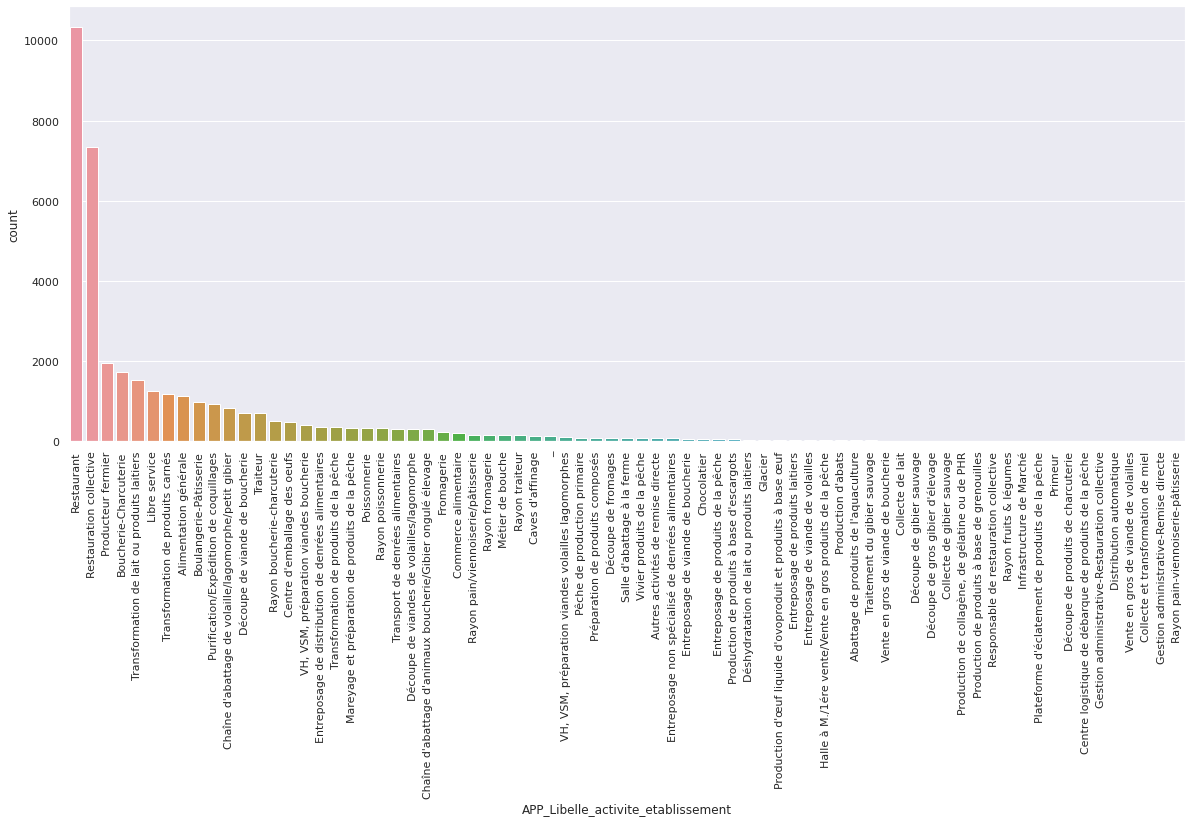

In [27]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
plt.xticks(rotation='vertical')
sns.countplot(data=df_explode,x="APP_Libelle_activite_etablissement", order = df_explode['APP_Libelle_activite_etablissement'].value_counts().index)

In [28]:
df_explode['APP_Libelle_activite_etablissement'].value_counts()[df_explode['APP_Libelle_activite_etablissement'].value_counts()<= 10].sum()

79

### Variables Qualitatives

<AxesSubplot:xlabel='Synthese_eval_sanit', ylabel='count'>

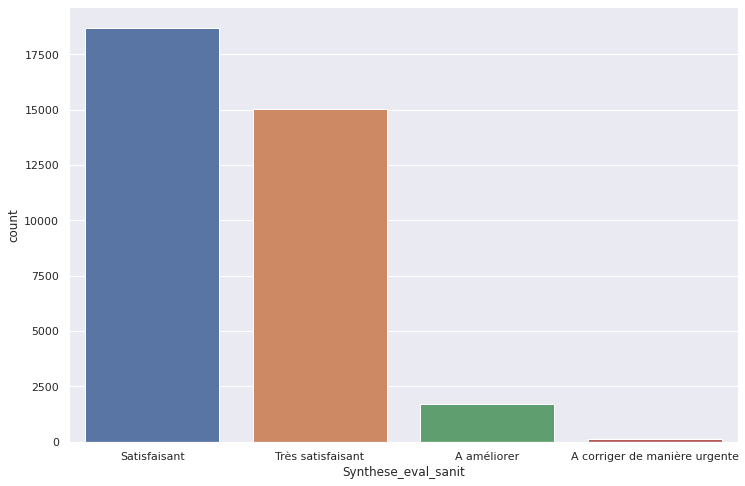

In [29]:
"""for col in df[["APP_Libelle_activite_etablissement","Synthese_eval_sanit"]]:
    plt.figure()
    df[col].value_counts().plot.pie()"""
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,8))
sns.countplot(data=df,x="Synthese_eval_sanit")

In [30]:
s = df_explode.groupby('Synthese_eval_sanit')['APP_Libelle_activite_etablissement'].value_counts(normalize=True)
s

Synthese_eval_sanit  APP_Libelle_activite_etablissement   
A améliorer          Restaurant                               0.329983
                     Restauration collective                  0.125070
                     Boucherie-Charcuterie                    0.086544
                     Boulangerie-Pâtisserie                   0.075935
                     Alimentation générale                    0.041876
                                                                ...   
Très satisfaisant    Collecte et transformation de miel       0.000064
                     Distribution automatique                 0.000064
                     Gestion administrative-Remise directe    0.000064
                     Infrastructure de Marché                 0.000064
                     Rayon pain-viennoiserie-pâtisserie       0.000064
Name: APP_Libelle_activite_etablissement, Length: 212, dtype: float64

In [31]:
# s = s.groupby('Synthese_eval_sanit')
# s

In [32]:
ameliorer=s.groupby('Synthese_eval_sanit').get_group("A améliorer")
ameliorer

Synthese_eval_sanit  APP_Libelle_activite_etablissement                          
A améliorer          Restaurant                                                      0.329983
                     Restauration collective                                         0.125070
                     Boucherie-Charcuterie                                           0.086544
                     Boulangerie-Pâtisserie                                          0.075935
                     Alimentation générale                                           0.041876
                     Producteur fermier                                              0.027917
                     Transformation de produits carnés                               0.027917
                     Traiteur                                                        0.025684
                     Libre service                                                   0.023451
                     Chaîne d'abattage de volaille/lagomorphe/petit gibi

In [33]:
s_to_df = s.reset_index(name='counts')
s_to_df

,Synthese_eval_sanit,APP_Libelle_activite_etablissement,counts
0,A améliorer,Restaurant,0.329983
1,A améliorer,Restauration collective,0.125070
2,A améliorer,Boucherie-Charcuterie,0.086544
3,A améliorer,Boulangerie-Pâtisserie,0.075935
4,A améliorer,Alimentation générale,0.041876
...,...,...,...
207,Très satisfaisant,Collecte et transformation de miel,0.000064
208,Très satisfaisant,Distribution automatique,0.000064
209,Très satisfaisant,Gestion administrative-Remise directe,0.000064
210,Très satisfaisant,Infrastructure de Marché,0.000064


<AxesSubplot:xlabel='APP_Libelle_activite_etablissement', ylabel='counts'>

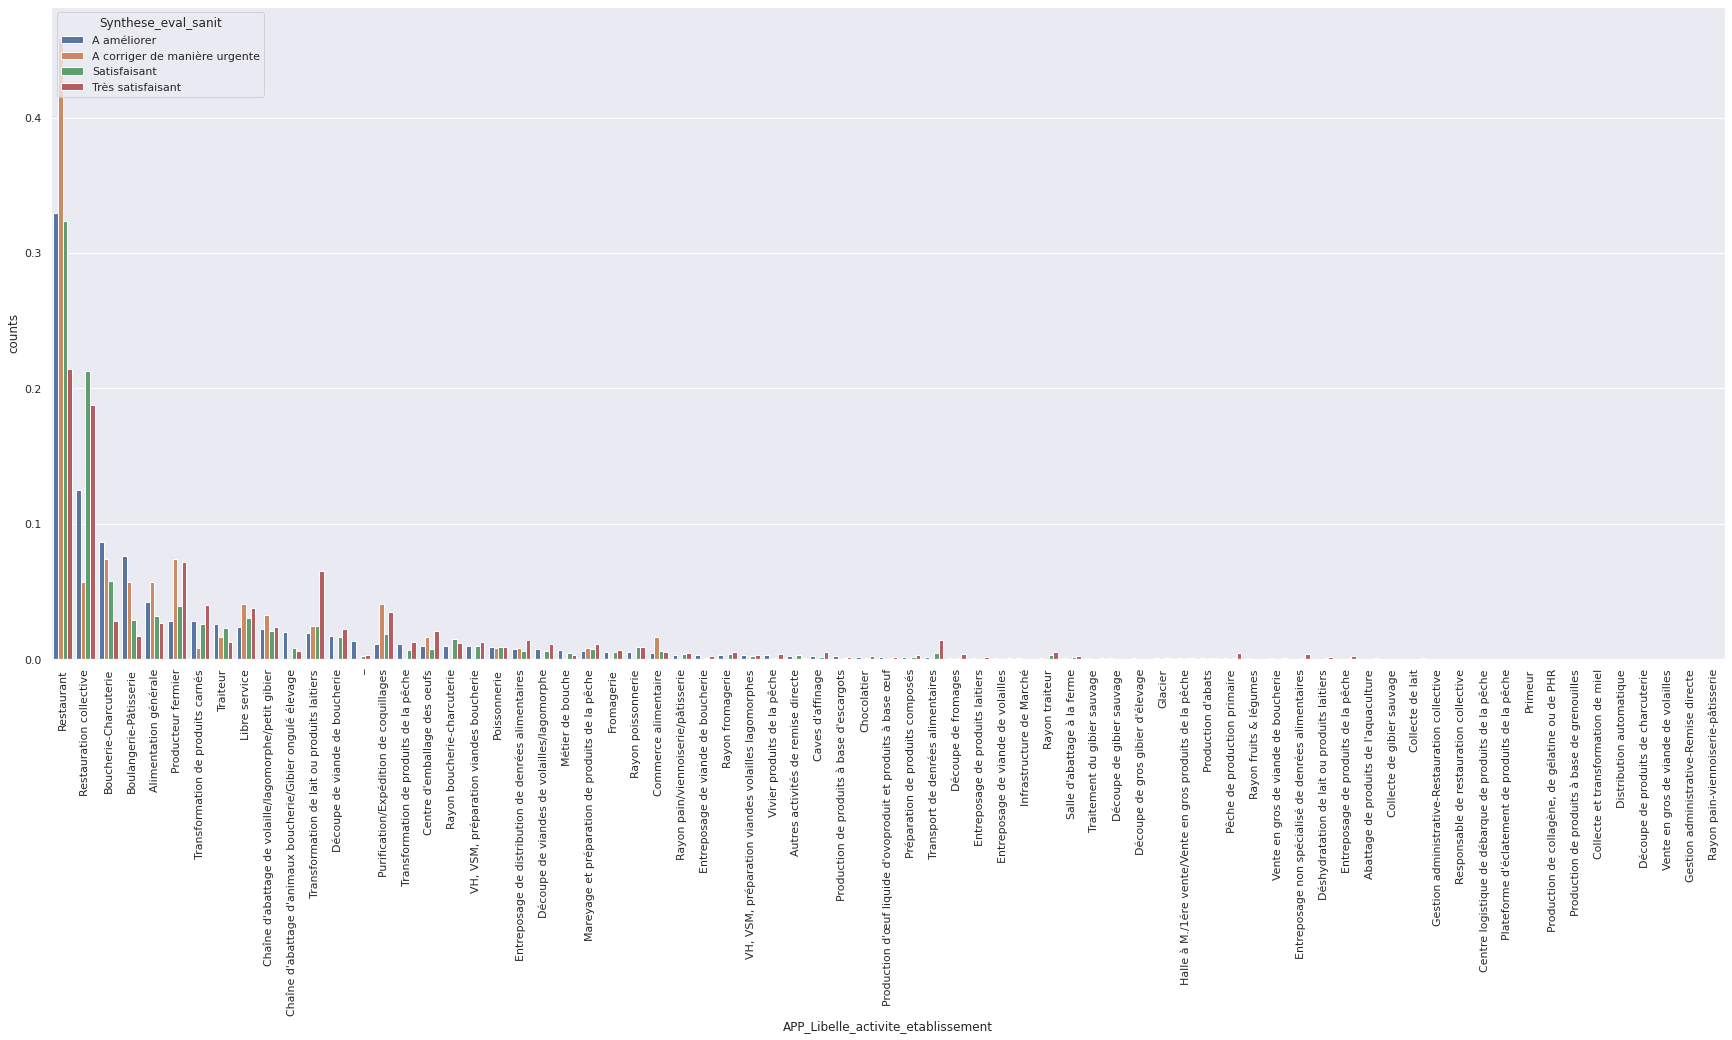

In [34]:
plt.figure(figsize=(30,12))
plt.xticks(rotation='vertical')
sns.barplot(data=s_to_df, x="APP_Libelle_activite_etablissement", y='counts',hue='Synthese_eval_sanit')

<AxesSubplot:xlabel='Synthese_eval_sanit', ylabel='counts'>

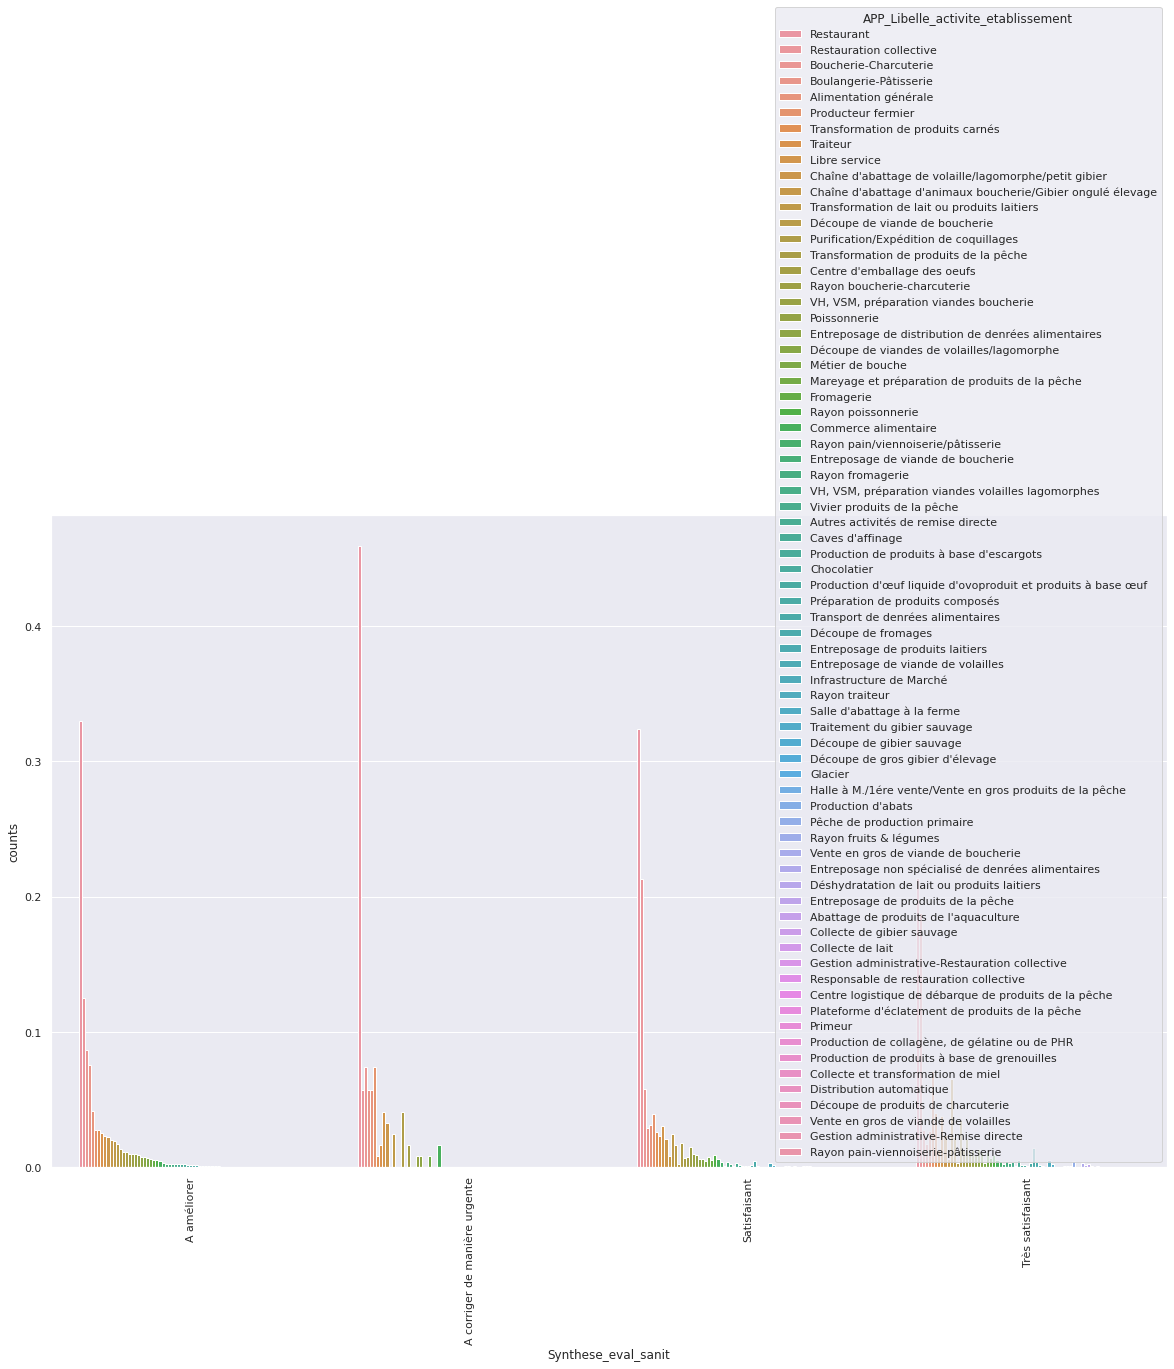

In [35]:
plt.figure(figsize=(20,12))
plt.xticks(rotation='vertical')
sns.barplot(data=s_to_df, x="Synthese_eval_sanit", y='counts',hue='APP_Libelle_activite_etablissement')

In [36]:
df['Synthese_eval_sanit'].value_counts(normalize=True)

Satisfaisant                     0.526239
Très satisfaisant                0.422268
A améliorer                      0.048203
A corriger de manière urgente    0.003290
Name: Synthese_eval_sanit, dtype: float64

In [37]:
s_to_df['Synthese_eval_sanit'].value_counts(normalize=True)

Très satisfaisant                0.339623
Satisfaisant                     0.325472
A améliorer                      0.254717
A corriger de manière urgente    0.080189
Name: Synthese_eval_sanit, dtype: float64

In [38]:
# relation entreprise/activités et notes

## Relation Target / Variables
### Encodage des variables

In [39]:

activities_table = pd.pivot_table(df_explode, values=[ 'APP_Libelle_activite_etablissement'], index=['SIRET'],aggfunc='count')
multi_activities=activities_table[activities_table.APP_Libelle_activite_etablissement == 1]
print(df_explode.shape)
multi_activities


(37114, 12)


,APP_Libelle_activite_etablissement
SIRET,
00705004000018,1
00715030300027,1
00728021700014,1
01645029800019,1
01705065900063,1
...,...
SIRET000028765,1
SIRET000029241,1
SIRET000029247,1


In [40]:
df_explode[df_explode.SIRET == '21130055300016']

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,ods_type_activite
1594,MAIRIE COMMUNE DE MARSEILLE,21130055300016,21 BD DE LA SAVINE,13015,Marseille 15e Arrondissement,22-001039-1,2022-01-10T01:00:00+01:00,Restauration collective,Très satisfaisant,NaN,"43.367723,5.366527",Autres
15476,MAIRIE COMMUNE DE MARSEILLE,21130055300016,56 Bd. de la Fédération,13004,Marseille 4e Arrondissement,21-083899-1,2021-10-15T02:00:00+02:00,Restauration collective,Très satisfaisant,NaN,"43.312309,5.402973",Autres
15850,MAIRIE COMMUNE DE MARSEILLE,21130055300016,Allée Yvon Morandat,13008,Marseille 8e Arrondissement,21-083151-1,2021-10-13T02:00:00+02:00,Restauration collective,Satisfaisant,NaN,NaN,Autres
15918,MAIRIE COMMUNE DE MARSEILLE,21130055300016,"47, Avenue St Paul",13013,Marseille 13e Arrondissement,21-097416-1,2021-11-30T01:00:00+01:00,Restauration collective,Très satisfaisant,NaN,"43.327525,5.40739",Autres
15919,MAIRIE COMMUNE DE MARSEILLE,21130055300016,Crèche REDON,13009,Marseille 9e Arrondissement,21-037759-1,2021-05-11T02:00:00+02:00,Restauration collective,Très satisfaisant,NaN,"43.249547,5.422467",Autres
15970,MAIRIE COMMUNE DE MARSEILLE,21130055300016,5 Rue Paul Converset,13014,Marseille 14e Arrondissement,21-099199-1,2021-12-06T01:00:00+01:00,Restauration collective,Très satisfaisant,NaN,"43.347555,5.377398",Autres
16307,MAIRIE COMMUNE DE MARSEILLE,21130055300016,63 Tr. la Valbarelle St Cyr,13010,Marseille 10e Arrondissement,21-019334-1,2021-03-08T01:00:00+01:00,Restauration collective,Très satisfaisant,NaN,"43.281316,5.440172",Autres
28739,MAIRIE COMMUNE DE MARSEILLE,21130055300016,22 RUE BERARD,13005,Marseille 5e Arrondissement,22-005188-1,2022-01-24T01:00:00+01:00,Restauration collective,Très satisfaisant,NaN,"43.286896,5.393725",Autres
28751,MAIRIE COMMUNE DE MARSEILLE,21130055300016,5 RUE JOBIN,13003,Marseille 3e Arrondissement,22-003378-1,2022-01-20T01:00:00+01:00,Restauration collective,Très satisfaisant,NaN,"43.310635,5.389143",Autres
28815,MAIRIE COMMUNE DE MARSEILLE,21130055300016,194 RUE CHARLES KADDOUZ,13012,Marseille 12e Arrondissement,21-026915-1,2021-04-01T02:00:00+02:00,Restauration collective,Très satisfaisant,NaN,"43.316674,5.436379",Autres


In [41]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[["Très satisfaisant","Satisfaisant","A améliorer","A corriger de manière urgente"]])
Label_synthese=[["Très satisfaisant"],["Satisfaisant"],["A améliorer"],["A corriger de manière urgente"]]
# entraîner le modèle selon l'ordre établi dans categories
enc.fit(Label_synthese)

# observer si le classement est respecté
print("classement :\n", enc.transform(Label_synthese))

# tester avec un autre échantillon
print("échantillon :\n", enc.transform( [["Très satisfaisant"], ["A corriger de manière urgente"]] ))

# faire de même avec les valeurs numériques
print("inverse :\n", enc.inverse_transform([[3], [0]]))

classement :
 [[0.]
 [1.]
 [2.]
 [3.]]
échantillon :
 [[0.]
 [3.]]
inverse :
 [['A corriger de manière urgente']
 ['Très satisfaisant']]


In [42]:
enc = OrdinalEncoder(categories=[["Très satisfaisant","Satisfaisant","A améliorer","A corriger de manière urgente"]])

df_explode['synthese_eval_encode'] = enc.fit_transform(df_explode.loc[:,['Synthese_eval_sanit']])
df_explode[['Synthese_eval_sanit', 'synthese_eval_encode']]

,Synthese_eval_sanit,synthese_eval_encode
0,Satisfaisant,1.0
1,Très satisfaisant,0.0
2,Très satisfaisant,0.0
3,Satisfaisant,1.0
4,Satisfaisant,1.0
...,...,...
35553,Satisfaisant,1.0
35554,Satisfaisant,1.0
35555,Satisfaisant,1.0
35556,Satisfaisant,1.0


In [43]:
df_matrice = df_explode.copy()
list_of_column = ['APP_Libelle_etablissement', 'Adresse_2_UA', 'Libelle_commune', 'geores']
df_matrice = df_matrice.drop(list_of_column, axis=1)

In [44]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

df_matrice['Date_inspection'] = pd.to_datetime(df_matrice['Date_inspection'], utc=True)
df_matrice['month'] = df_matrice.Date_inspection.dt.month
df_matrice = encode(df_matrice, 'month', 12)

df_matrice['day'] = df_matrice.Date_inspection.dt.month
df_matrice = encode(df_matrice, 'day', 365)
df_matrice

,SIRET,Code_postal,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,ods_type_activite,synthese_eval_encode,month,month_sin,month_cos,day,day_sin,day_cos
0,30247464800789,92240,15914760,2021-03-03 00:00:00+00:00,Alimentation générale,Satisfaisant,NaN,Autres,1.0,3,1.000000e+00,6.123234e-17,3,0.051620,0.998667
1,30112032500024,69500,16252422,2021-11-26 00:00:00+00:00,Restaurant,Très satisfaisant,NaN,Autres,0.0,11,-5.000000e-01,8.660254e-01,11,0.188227,0.982126
2,30247464801894,92800,15903092,2021-02-22 00:00:00+00:00,Alimentation générale,Très satisfaisant,NaN,Autres,0.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407
3,30890741900011,78460,15901554,2021-02-19 00:00:00+00:00,_,Satisfaisant,NaN,Autres,1.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407
4,30668909200022,94290,15968279,2021-04-14 00:00:00+00:00,Alimentation générale,Satisfaisant,NaN,Autres,1.0,4,8.660254e-01,-5.000000e-01,4,0.068802,0.997630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35553,21440079800069,44430,21-048337-1,2021-06-11 00:00:00+00:00,Restauration collective,Satisfaisant,44079001,Autres,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671
35554,77570767200033,78120,21-080904-1,2021-10-07 00:00:00+00:00,Restauration collective,Satisfaisant,78517061,Autres,1.0,10,-8.660254e-01,5.000000e-01,10,0.171293,0.985220
35555,44299272300019,71200,21-060380-1,2021-07-23 00:00:00+00:00,Restaurant,Satisfaisant,NaN,Autres,1.0,7,-5.000000e-01,-8.660254e-01,7,0.120208,0.992749
35556,19780260600024,78450,21-040496-1,2021-06-02 00:00:00+00:00,Restauration collective,Satisfaisant,NaN,Autres,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671


In [45]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

# solution 1 - Label Encoding
df_matrice["APP_Libelle_activite_etablissement"] = df_matrice["APP_Libelle_activite_etablissement"].astype('category')
df_matrice["activite_category"] = df_matrice["APP_Libelle_activite_etablissement"].cat.codes
df_matrice

# solution 2 - One Hot Encoding
# df_matrice = pd.get_dummies(df_explode, columns=["APP_Libelle_activite_etablissement"]).iloc[:, 12:]
# df_matrice


,SIRET,Code_postal,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,ods_type_activite,synthese_eval_encode,month,month_sin,month_cos,day,day_sin,day_cos,activite_category
0,30247464800789,92240,15914760,2021-03-03 00:00:00+00:00,Alimentation générale,Satisfaisant,NaN,Autres,1.0,3,1.000000e+00,6.123234e-17,3,0.051620,0.998667,1
1,30112032500024,69500,16252422,2021-11-26 00:00:00+00:00,Restaurant,Très satisfaisant,NaN,Autres,0.0,11,-5.000000e-01,8.660254e-01,11,0.188227,0.982126,58
2,30247464801894,92800,15903092,2021-02-22 00:00:00+00:00,Alimentation générale,Très satisfaisant,NaN,Autres,0.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407,1
3,30890741900011,78460,15901554,2021-02-19 00:00:00+00:00,_,Satisfaisant,NaN,Autres,1.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407,72
4,30668909200022,94290,15968279,2021-04-14 00:00:00+00:00,Alimentation générale,Satisfaisant,NaN,Autres,1.0,4,8.660254e-01,-5.000000e-01,4,0.068802,0.997630,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35553,21440079800069,44430,21-048337-1,2021-06-11 00:00:00+00:00,Restauration collective,Satisfaisant,44079001,Autres,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671,59
35554,77570767200033,78120,21-080904-1,2021-10-07 00:00:00+00:00,Restauration collective,Satisfaisant,78517061,Autres,1.0,10,-8.660254e-01,5.000000e-01,10,0.171293,0.985220,59
35555,44299272300019,71200,21-060380-1,2021-07-23 00:00:00+00:00,Restaurant,Satisfaisant,NaN,Autres,1.0,7,-5.000000e-01,-8.660254e-01,7,0.120208,0.992749,58
35556,19780260600024,78450,21-040496-1,2021-06-02 00:00:00+00:00,Restauration collective,Satisfaisant,NaN,Autres,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671,59


In [46]:
df_matrice['Agrement'] = df_matrice['Agrement'].where(df_matrice['Agrement'].isnull(), 1).fillna(0).astype(int)
df_matrice = df_matrice[df_matrice['Code_postal'].isna() == False]
df_matrice = df_matrice.drop(['APP_Libelle_activite_etablissement', 'Synthese_eval_sanit', 'ods_type_activite'], axis=1)
df_matrice['Code_postal'] = df_matrice['Code_postal'].astype(int)

df_matrice

,SIRET,Code_postal,Numero_inspection,Date_inspection,Agrement,synthese_eval_encode,month,month_sin,month_cos,day,day_sin,day_cos,activite_category
0,30247464800789,92240,15914760,2021-03-03 00:00:00+00:00,0,1.0,3,1.000000e+00,6.123234e-17,3,0.051620,0.998667,1
1,30112032500024,69500,16252422,2021-11-26 00:00:00+00:00,0,0.0,11,-5.000000e-01,8.660254e-01,11,0.188227,0.982126,58
2,30247464801894,92800,15903092,2021-02-22 00:00:00+00:00,0,0.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407,1
3,30890741900011,78460,15901554,2021-02-19 00:00:00+00:00,0,1.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407,72
4,30668909200022,94290,15968279,2021-04-14 00:00:00+00:00,0,1.0,4,8.660254e-01,-5.000000e-01,4,0.068802,0.997630,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35553,21440079800069,44430,21-048337-1,2021-06-11 00:00:00+00:00,1,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671,59
35554,77570767200033,78120,21-080904-1,2021-10-07 00:00:00+00:00,1,1.0,10,-8.660254e-01,5.000000e-01,10,0.171293,0.985220,59
35555,44299272300019,71200,21-060380-1,2021-07-23 00:00:00+00:00,0,1.0,7,-5.000000e-01,-8.660254e-01,7,0.120208,0.992749,58
35556,19780260600024,78450,21-040496-1,2021-06-02 00:00:00+00:00,0,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671,59


In [47]:
df_matrice['departement'] = df_matrice['Code_postal'].astype(str).str[:2].astype(int)
df_matrice

,SIRET,Code_postal,Numero_inspection,Date_inspection,Agrement,synthese_eval_encode,month,month_sin,month_cos,day,day_sin,day_cos,activite_category,departement
0,30247464800789,92240,15914760,2021-03-03 00:00:00+00:00,0,1.0,3,1.000000e+00,6.123234e-17,3,0.051620,0.998667,1,92
1,30112032500024,69500,16252422,2021-11-26 00:00:00+00:00,0,0.0,11,-5.000000e-01,8.660254e-01,11,0.188227,0.982126,58,69
2,30247464801894,92800,15903092,2021-02-22 00:00:00+00:00,0,0.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407,1,92
3,30890741900011,78460,15901554,2021-02-19 00:00:00+00:00,0,1.0,2,8.660254e-01,5.000000e-01,2,0.034422,0.999407,72,78
4,30668909200022,94290,15968279,2021-04-14 00:00:00+00:00,0,1.0,4,8.660254e-01,-5.000000e-01,4,0.068802,0.997630,1,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35553,21440079800069,44430,21-048337-1,2021-06-11 00:00:00+00:00,1,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671,59,44
35554,77570767200033,78120,21-080904-1,2021-10-07 00:00:00+00:00,1,1.0,10,-8.660254e-01,5.000000e-01,10,0.171293,0.985220,59,78
35555,44299272300019,71200,21-060380-1,2021-07-23 00:00:00+00:00,0,1.0,7,-5.000000e-01,-8.660254e-01,7,0.120208,0.992749,58,71
35556,19780260600024,78450,21-040496-1,2021-06-02 00:00:00+00:00,0,1.0,6,1.224647e-16,-1.000000e+00,6,0.103102,0.994671,59,78


In [48]:
df_matrice.to_csv('matrice.csv', index=False)

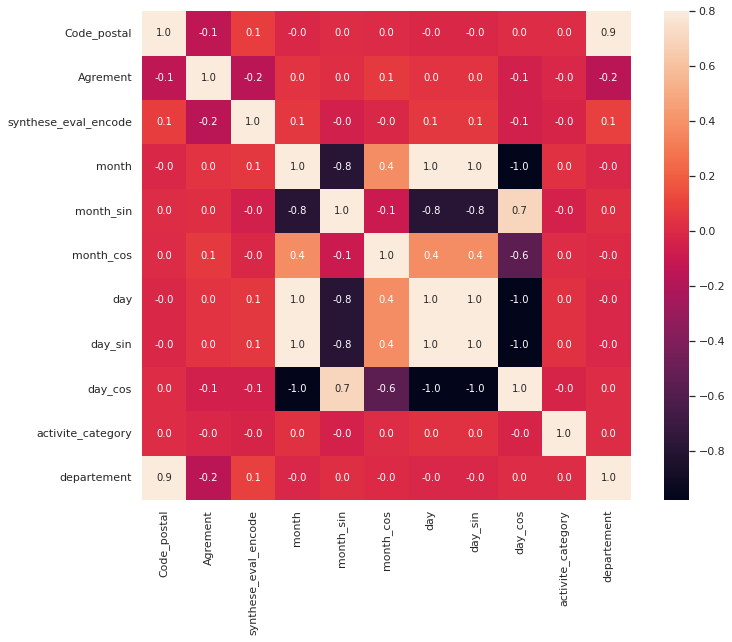

In [49]:
# Correlation matrix
corrmat = df_matrice.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cbar=True, annot=True, fmt='.1f', annot_kws={'size': 10});
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6a1379aa-ea9c-402c-95ca-194460431a68' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>